### Imports

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import sys
import pandas as pd
from pathlib import Path
import seaborn as sns
import json
sys.path.append('..')

In [2]:
path_to_dataset = Path('../dataset/Kvasir-SEG/')

### Example of reading items from dataset

In [3]:
from data.dataset import KvasirDatasetBase
from data.utils import plot_mask_over_image, collect_statistic

In [4]:
dataset_train = KvasirDatasetBase(root_dir = path_to_dataset)

100%|██████████| 1000/1000 [00:00<00:00, 5137.20it/s]

Initialized augmentations:


In [5]:
for k, v in dataset_train.__getitem__(0).items():
    if isinstance(v, torch.Tensor): print(f'{k}: {v.shape}, {v.min()}, {v.max()}, {v.dtype}, {v.sum()}')

input: torch.Size([3, 529, 622]), 0.0, 1.0, torch.float32, 442413.25
target: torch.Size([529, 622]), False, True, torch.bool, 91288


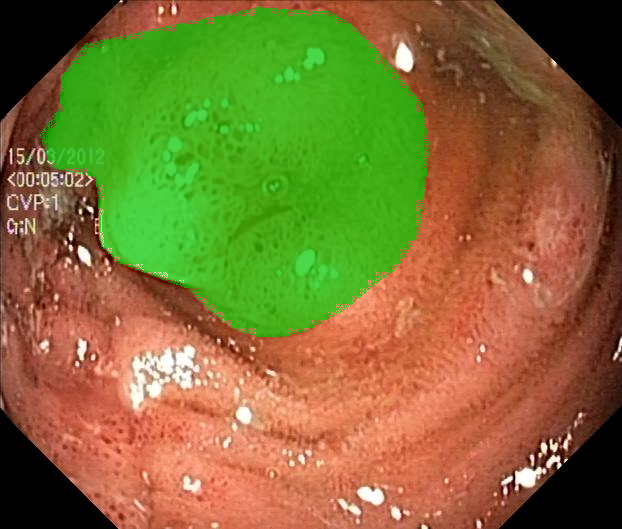

[tensor([0.0611, 0.0095, 0.6913, 0.6389])]

In [6]:
data_ = dataset_train.__getitem__(0)
input_ = data_['input']
target_ = data_['target']
bboxes_ = data_['bboxes']

plot_mask_over_image(input_, target_)
bboxes_

In [7]:
statistic_train = collect_statistic(dataset_train)

processing dataset: 1000it [00:09, 110.68it/s]


In [8]:
import matplotlib.pyplot as plt
from matplotlib import colors

def plot_hist(data, n_bins, title, ysacle='linear', stat='count'):
    if isinstance(data, list):
        data_ = list(map(float, data))
    elif isinstance(data, dict):
        data_ = {}
        for k in data:
            data_[k] = list(map(float, data.get(k)))
    fig, axs = plt.subplots(1, 1, sharey=True, tight_layout=True)
    hist = sns.histplot(data_, bins=n_bins, ax=axs, stat=stat)
    axs.set_title(title)
    axs.set_yscale(ysacle)
    plt.savefig(f'./images/{title}.png', dpi=300)
    plt.show()

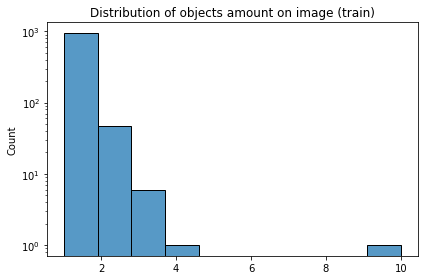

In [9]:
plot_hist(statistic_train['objects_counts'], 10, 'Distribution of objects amount on image (train)', ysacle='log')

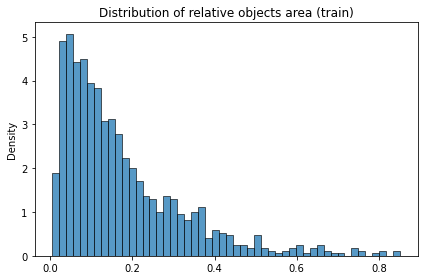

In [10]:
plot_hist(statistic_train['object_areas'], 50, 'Distribution of relative objects area (train)', stat='density')

In [11]:
dataset_test = KvasirDatasetBase(root_dir = Path('../dataset/sessile-main-Kvasir-SEG/'))

100%|██████████| 196/196 [00:00<00:00, 11128.19it/s]

Warning! ../dataset/sessile-main-Kvasir-SEG/kavsir_bboxes.json file not found, dataset will be without bboxes
Initialized augmentations:


In [12]:
statistic_test = collect_statistic(dataset_test)

processing dataset: 196it [00:01, 143.69it/s]


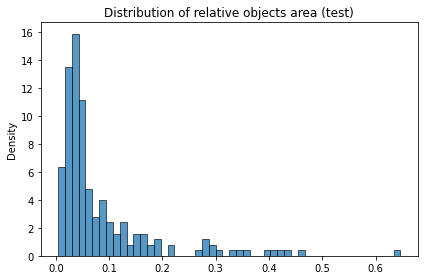

In [13]:
plot_hist(statistic_test['object_areas'], 50, 'Distribution of relative objects area (test)', stat='density')

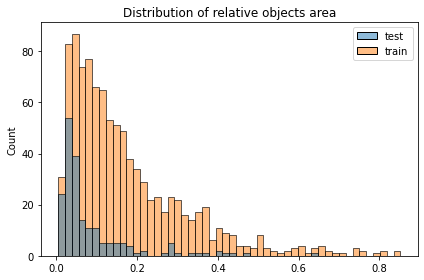

In [14]:
statistic_joined = {
    'test': statistic_test['object_areas'],
    'train': statistic_train['object_areas'],
}
plot_hist(statistic_joined, 50, 'Distribution of relative objects area')

In [15]:
# mask = np.array(Image.open(f'{path_to_dataset / "masks/cju0qkwl35piu0993l0dewei2.jpg"}'))[:, :, 0] == 255
# image_raw = Image.open(f'{path_to_dataset / "images/cju0qkwl35piu0993l0dewei2.jpg"}')
# print(image_raw.size, mask.shape)
# labeled_image = np.array(image_raw)
# labeled_image[mask, 1] = 190.
# labeled_image = Image.fromarray(labeled_image)

# with open(f'{path_to_dataset / "kavsir_bboxes_.json"}') as f:
#     bboxes = json.load(f)
    
# curr_bboxes = bboxes['cju0qkwl35piu0993l0dewei2']['bbox']
# draw=ImageDraw.Draw(labeled_image)

# for bbox in curr_bboxes:
#     draw.rectangle(
#         [
#             (bbox['xmin'], bbox['ymin']),
#             (bbox['xmax'],bbox['ymax'])
#         ],
#         outline="blue",
#         width=3
#     )